In [33]:
import requests
import joblib
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from pandas import option_context
from pywin.framework.app import contributors
from tqdm import tqdm
from statsmodels.stats.inter_rater import aggregate_raters
from sklearn.metrics import cohen_kappa_score
from scipy.stats import mannwhitneyu,shapiro,ttest_ind

import cliffsDelta as cd
import GenerateActivities as gat
import important_features as imf

In [34]:
QUERY_ROOT = "https://api.github.com"
TOKEN = '' # write your GitHub API key here
HEADERS={'Authorization':'token '+TOKEN}

## Section 3

### Question 1

#### Write an automated Python script to identify all GitHub bot actors in the list of contributors, by querying the GitHub REST API users endpoint and extracting the required information to make this decision. 

#### More information: You can search for the "type" key in the obtianed JSON result, If it is "Bot", then it is a bot actor, if it is "User", then it is an account.

In [35]:
# 1. Read the given <sample>.csv file into a pandas DataFrame (df).
# 2. Make sure there are 2 columns, one column name is "contributor" that has the name of the contributor, 
#    and another column name is "bothunter_type" that you will use later on in this assignment.
# 3. Display the DataFrame.

# YOUR CODE BELOW
df = pd.read_csv("Contributors/sample8.csv")
df.head()

,contributor,bothunter_type
0,Armavica,Human
1,EmilyXinyi,Human
2,GPUtester,Human
3,JuliaTagBot,Bot
4,MarcBerliner,Human


In [36]:
# 1. Store the names of the contributors in a list
# 2. print the list

# YOUR CODE BELOW
contributors = df['contributor'].tolist()
contributors

['Armavica',
 'EmilyXinyi',
 'GPUtester',
 'JuliaTagBot',
 'MarcBerliner',
 'SaimMomin12',
 'ViralBShah',
 'allcontributors[bot]',
 'alxbnct',
 'avik-pal',
 'bioc-workshop-dev',
 'bpinsard',
 'codecov-commenter',
 'cproctor',
 'dependabot[bot]',
 'drammock',
 'fjetter',
 'github-merge-queue[bot]',
 'hayesla',
 'jacobtomlinson',
 'jni',
 'kanishkan91',
 'leofang',
 'lumberbot-app[bot]',
 'martey',
 'mergify[bot]',
 'minhqdao',
 'natefoo',
 'netlify[bot]',
 'oscardssmith',
 'pmeier',
 'rwegener2',
 'sklearn-ci',
 'soupault',
 'stan-buildbot',
 'tardis-bot',
 'timtreis',
 'welcome[bot]',
 'wm75',
 'zeptodoctor']

In [37]:
# 1. Using a for loop, iterate over each contributor in the list and query the GitHub Users API.
#    You can use "query = f'{QUERY_ROOT}/users/{contributor}'", where QUERY_ROOT is defined at the beginning of this notebook 
#    and 'contributor' is each individual contributor from the list
# 2. Get the response using 'response = requests.get(query, headers=HEADERS)'.
# 3. convert the response to JSON using 'json_response = response.json()'.
# 4. Iterate over each JSON response and get the value of the 'type' key. If it is "Bot" then the contributor is a bot actor, 
#    if "User" then the contributor is an account. You should boolean values to indicate if the contributor is a bot actor (True) or User/Organisation (False)
# 5. Save these results in list of dictionary of the form [{'contributor': <contributor name>, 'app': <boolean value>}, {...}, {...}, {...}].
#    Lets call this list as "app_dict"
# 6. Finally convert this list of dictionary to DataFrame by writing 'pd.DataFrame.from_dict(app_dict)'
# 7. Display the DataFrame. This should have two columns - contributor and app

# YOUR CODE BELOW
app_dict = []
for contributor in contributors:
    query = f'{QUERY_ROOT}/users/{contributor}'
    response = requests.get(query, headers=HEADERS)
    json_response = response.json()
    if json_response['type'] == 'Bot':
        app_dict.append({'contributor': contributor, 'app': True})
    else:
        app_dict.append({'contributor': contributor, 'app': False})
app_df = pd.DataFrame.from_dict(app_dict)
app_df

,contributor,app
0,Armavica,False
1,EmilyXinyi,False
2,GPUtester,False
3,JuliaTagBot,False
4,MarcBerliner,False
5,SaimMomin12,False
6,ViralBShah,False
7,allcontributors[bot],True
8,alxbnct,False
9,avik-pal,False


### Question 2

#### Add a new 'actor' column in the CSV file to store this information. You can write True if it is a bot actor and False if it is not.

#### Report on the total number of GitHub bot actors, and User accounts present in the list of accounts of your dataset.

In [38]:
# Merge the app DataFrame to df by writing 'pd.merge(df, <app df>, on='contributor'). This is similar to SQL join on primary key 'contributor'.
# The resultant df should have 3 columns - contributor, bothunter_type and user_type.

# YOUR CODE BELOW
df = pd.merge(df, app_df, on='contributor')
df

,contributor,bothunter_type,app
0,Armavica,Human,False
1,EmilyXinyi,Human,False
2,GPUtester,Human,False
3,JuliaTagBot,Bot,False
4,MarcBerliner,Human,False
5,SaimMomin12,Human,False
6,ViralBShah,Human,False
7,allcontributors[bot],Bot,True
8,alxbnct,Human,False
9,avik-pal,Human,False


In [39]:
#change the column name to user_type
df.rename(columns={'app':'user_type'}, inplace=True)

In [40]:
df

,contributor,bothunter_type,user_type
0,Armavica,Human,False
1,EmilyXinyi,Human,False
2,GPUtester,Human,False
3,JuliaTagBot,Bot,False
4,MarcBerliner,Human,False
5,SaimMomin12,Human,False
6,ViralBShah,Human,False
7,allcontributors[bot],Bot,True
8,alxbnct,Human,False
9,avik-pal,Human,False


### Question 3

#### For each bot actor, write their purpose, the task that they automate by looking at their GitHub profile, homepage, information on the GitHub Marketplace, or other documentation that you can find online.


In [41]:
#For each bot actor, write their purpose, the task that they automate by looking at their GitHub profile, homepage, information on the GitHub Marketplace, or other documentation that you can find online
# YOUR CODE BELOW
#Show the bot actor
df[df['user_type']==True]

,contributor,bothunter_type,user_type
7,allcontributors[bot],Bot,True
14,dependabot[bot],Bot,True
17,github-merge-queue[bot],Bot,True
23,lumberbot-app[bot],Bot,True
25,mergify[bot],Bot,True
28,netlify[bot],Bot,True
37,welcome[bot],Bot,True


allcontributors[bot]: a bot to automate the tedious stuff for adding project contributors

dependabot[bot]: Inform you about vulnerabilities in the dependencies that you use in your repository

github-merge-queue[bot]: helps increase velocity by automating pull request merges into a busy branch and ensuring the branch is never broken by incompatible changes

lumberbot-app[bot]: @scientific-python app bot that responds to commands, backport Pull-Request, give fine grained permissions to users.

mergify[bot]: a powerful, innovative tool designed to automate your GitHub workflows

netlify[bot]: detects your changes and triggers automated deploys, functions, and more across our global CDN

welcome[bot]: a GitHub App that welcomes new users to your repository



## Section 4

### Question 1

#### Write an automated script to use BIMBAS (Bot Identification Model Based on Activity Sequences) to obtain a prediction of the GitHub contributor type (Bot or Human) for the contributors present in your dataset.

#### Folow the steps given in each cell to use BIMBAS and obtain predictions.

### Read all the events and select the events performed by the contributors present in the given set

In [42]:
# 1. Read the csv file of events (all_events.csv) provided along with this notebook
# 2. Convert created_at column to datetime format 
#    One possible way is to use lambda function: "events.assign(created_at=lambda d: pd.to_datetime(d.created_at, unit='ms'))"
# 3. Get the contributors provided to you in a list or use the contributors list that you created in Section 3 Question 1. 
#    e.g., ['contributor1', 'contributor2', 'contributor3',...]
# 4. Select the events performed by these contributors alone. Do not consider all the events. You should consider only the events
#    performed by the contributors provided to you. Hint: you can use the df.query function
# 5. Display the considered events.

# YOUR CODE BELOW
events = pd.read_csv("all_events.csv")
events = events.assign(created_at=lambda d: pd.to_datetime(d.created_at, unit='ms'))
selected_events = events[events['login'].isin(contributors)]
selected_events


,Unnamed: 0,event_id,event_type,login,repository,created_at,action,PR_number,state,PR_node_id,...,comment_node_id,merged,ref,ref_type,issue_number,issue_node_id,issue_closed_at,tag_name,release_node_id,org
29,29,39747452010,IssueCommentEvent,JuliaTagBot,SciML/CommonWorldInvalidations.jl,2024-07-01 00:07:04,created,NaN,closed,NaN,...,IC_kwDOMOEgaM6DD0Tk,NaN,NaN,NaN,5.0,I_kwDOMOEgaM6N6wg8,2024-06-28T18:51:28Z,NaN,NaN,SciML
49,49,39747566230,PullRequestEvent,jni,napari/napari,2024-07-01 00:17:47,closed,7041.0,closed,PR_kwDOCJ0aI85z-iY3,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,napari
50,50,39747566306,PushEvent,jni,napari/napari,2024-07-01 00:17:47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,napari
64,64,39747593861,IssueCommentEvent,netlify[bot],QuantEcon/lecture-python-intro,2024-07-01 00:20:10,created,493.0,open,PR_kwDOIy5DFs50AAal,...,IC_kwDOIy5DFs6DD2NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QuantEcon
163,163,39747766396,CreateEvent,dependabot[bot],SciML/EasyModelAnalysis.jl,2024-07-01 00:34:53,NaN,NaN,NaN,NaN,...,NaN,NaN,dependabot/github_actions/actions/add-to-proje...,branch,NaN,NaN,NaN,NaN,NaN,SciML
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358380,358380,42415246599,PushEvent,avik-pal,SciML/LineSearch.jl,2024-09-30 23:20:39,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SciML
358381,358381,42415246464,PullRequestEvent,avik-pal,SciML/LineSearch.jl,2024-09-30 23:20:39,closed,7.0,closed,PR_kwDOLCAB0M579DAU,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SciML
358382,358382,42415246730,DeleteEvent,avik-pal,SciML/LineSearch.jl,2024-09-30 23:20:40,NaN,NaN,NaN,NaN,...,NaN,NaN,ap/start,branch,NaN,NaN,NaN,NaN,NaN,SciML
358383,358383,42415258702,CommitCommentEvent,avik-pal,SciML/LineSearch.jl,2024-09-30 23:21:23,NaN,NaN,NaN,NaN,...,CC_kwDOLCAB0M4IyT98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SciML


### Execute BIMBAS to obtain the predictions

In [43]:
# Do not modify this cell
# Use the following function the code below to obtain your predictions

def execute_bimbas(contributors_list, selected_events):
    '''
    args: contributors_list (list) - list of contributors in the dataset provided to you
          selected_events (DataFrame) - DataFrame of events performed by the considered contributors
    return: bimbas_prediction (DataFrame) - DataFrame of preditions along with the confidence in prediction for each contributor
    '''
    result=pd.DataFrame()
    temp_list = []
    bimbas = joblib.load('bimbas.joblib')
    date_limit = pd.to_datetime(selected_events.created_at.max()) + pd.DateOffset(-90)
    
    for contributor in tqdm(contributors_list):
        # c = contributors[contributor]
        activities = gat.activity_identification(selected_events.query('login==@contributor and created_at>=@date_limit'))
        activity_features = (
                            imf.extract_features(activities)
                            .set_index([[contributor]])
                            )
        # features = pd.concat([features,activity_features])
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            probability = bimbas.predict_proba(activity_features)[0][1]
        if(probability <= 0.5):
            contributor_type = 'Human'
        else:
            contributor_type = 'Bot'
        confidence = (abs(probability - 0.5)*2).round(3)
    
        pred = activity_features.set_index([[contributor]]).assign(
            prediction=contributor_type,
            confidence = confidence,
            )
        temp_list.extend([{'contributor':contributor,'bimbas_type':contributor_type,'confidence':confidence}])
    
    bimbas_prediction = pd.DataFrame.from_dict(temp_list)

    return(bimbas_prediction)

In [44]:
# Write your code here to call execute_bimbas function. 
# Pass the contributors list and the filtered events DataFrame as argument to "execute_bimbas" function
# Prediction returned by BIMBAS will have "contributor", "bimbas_type" and "confidence"
# Note: Print the prediction provided by BIMBAS - else this cell will not be graded.

# YOUR CODE BELOW
bimbas_predictions = execute_bimbas(contributors, selected_events)
bimbas_predictions

100%|██████████| 40/40 [00:06<00:00,  5.94it/s]


,contributor,bimbas_type,confidence
0,Armavica,Human,0.958
1,EmilyXinyi,Human,0.817
2,GPUtester,Bot,0.841
3,JuliaTagBot,Bot,0.345
4,MarcBerliner,Human,0.850
5,SaimMomin12,Human,0.771
6,ViralBShah,Human,0.903
7,allcontributors[bot],Bot,0.567
8,alxbnct,Bot,0.807
9,avik-pal,Human,0.648


### Create a column in your predictions DataFrame to have predictions provided by BIMBAS. 
### Now your DataFrame should have the following columns - contributor, bothunter_type, app, bimbas_type, confidence 

### Merging bothunter and bimbas predictions

In [45]:
# Merge the predictions provided by BIMBAS to the resultant dataset of Section 3. This final DataFrame should have the following columns - 
# contributor, bothunter_type, user_type, bimbas_type, and confidence.
# YOUR CODE BELOW
df = pd.merge(df, bimbas_predictions, on='contributor')
df

,contributor,bothunter_type,user_type,bimbas_type,confidence
0,Armavica,Human,False,Human,0.958
1,EmilyXinyi,Human,False,Human,0.817
2,GPUtester,Human,False,Bot,0.841
3,JuliaTagBot,Bot,False,Bot,0.345
4,MarcBerliner,Human,False,Human,0.850
5,SaimMomin12,Human,False,Human,0.771
6,ViralBShah,Human,False,Human,0.903
7,allcontributors[bot],Bot,True,Bot,0.567
8,alxbnct,Human,False,Bot,0.807
9,avik-pal,Human,False,Human,0.648


### Question 2
#### Using Cohen's Kappa compute and report the interrater agreement score between the labels computed by both the bot identification approaches. Mention your interpretation of Cohen's Kappa

In [46]:
# Hint: use the cohen_kappa_score library
# YOUR CODE BELOW
cohen_kappa_score(df['bothunter_type'], df['bimbas_type'])

np.float64(0.46380697050938335)

0.46: Moderate agreement

### Question 3
#### Determine the final type of each contributor. Whenever user_type column has the value "User" check if both bimbas_type and bothunter_type give the same prediction, then consider it as your final prediction in "acc_type" column.
#### For the contributors that have different predictions, i.e. bimbas_type is not same as bothunter_type, then make a manual verification and consider that as the type for that contributor. Add an extra column to the DataFrame ﬁle called 'manual' that has the label determined by you. 
#### For manual verification you can make use the GitHub UI and the GitHub API https://api.github.com/users/username

#### Whenever user_type column has the value "Bot", directly write your final acc_type as "Bot Actor"

#### More information:
For each contributor, you can look at their activities in GitHub UI, look at their latest events using GitHub Events API - https://api.github.com/users/<contributor>/events, to make a decision on their type.

In addition, you can also write a very small reason why do you think they are bot or human (e.g., same activity at regular interval so Bot, files committed and code modified looks like Human, comments look like Human, comment look like Bot, test report looks automated so Bot, and so on....). This will be useful to answer your next question.

In [47]:
# Write the code for your manual decision here
# example : 
# manual_list_dict = [{'contributor': '<contributor name>', 'manual': '<your prediction>'}, {....}, {....}, {....}]
# pd.DataFrame.from_dict(manual_list_dict)

# YOUR CODE BELOW
manual_list_dict = []
for index, row in df.iterrows():
    if row['user_type']:
        manual_list_dict.append({'contributor': row['contributor'], 'manual': 'Bot Actor'})
    elif row['bothunter_type'] == row['bimbas_type']:
        manual_list_dict.append({'contributor': row['contributor'], 'manual': row['bothunter_type']})
    else:
        manual_list_dict.append({'contributor': row['contributor'], 'manual': 'verification'})
manual_df = pd.DataFrame.from_dict(manual_list_dict)
#show all verification
manual_df[manual_df['manual']=='verification']


,contributor,manual
2,GPUtester,verification
8,alxbnct,verification
10,bioc-workshop-dev,verification
13,cproctor,verification
21,kanishkan91,verification
31,rwegener2,verification
34,stan-buildbot,verification
35,tardis-bot,verification
39,zeptodoctor,verification


In [48]:
#appel Api pour verifier les utilisateurs
def check_user_type(contributor):
    query = f'{QUERY_ROOT}/users/{contributor}'
    response = requests.get(query, headers=HEADERS)
    json_response = response.json()
    return json_response

verification_list = manual_df[manual_df['manual']=='verification']['contributor'].tolist()
verification_list


['GPUtester',
 'alxbnct',
 'bioc-workshop-dev',
 'cproctor',
 'kanishkan91',
 'rwegener2',
 'stan-buildbot',
 'tardis-bot',
 'zeptodoctor']

In [49]:
for contributor in verification_list:
	user_type = check_user_type(contributor)
	print(contributor, user_type)

GPUtester {'login': 'GPUtester', 'id': 38199262, 'node_id': 'MDQ6VXNlcjM4MTk5MjYy', 'avatar_url': 'https://avatars.githubusercontent.com/u/38199262?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/GPUtester', 'html_url': 'https://github.com/GPUtester', 'followers_url': 'https://api.github.com/users/GPUtester/followers', 'following_url': 'https://api.github.com/users/GPUtester/following{/other_user}', 'gists_url': 'https://api.github.com/users/GPUtester/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/GPUtester/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/GPUtester/subscriptions', 'organizations_url': 'https://api.github.com/users/GPUtester/orgs', 'repos_url': 'https://api.github.com/users/GPUtester/repos', 'events_url': 'https://api.github.com/users/GPUtester/events{/privacy}', 'received_events_url': 'https://api.github.com/users/GPUtester/received_events', 'type': 'User', 'user_view_type': 'public', 'site_admin': False, 'name':

GPUtester is a bot because it has a lot of activity in a short period of time and the activity is repetitive

alxbnct isn't a bot because he has his name and surname on his profile and he also has public repositories about exercises

bioc-workshop-dev is a bot because all his action begins with "DO NOT INCLUDE REQUESTS IN THE FIRST COMMENT.
PLEASE POST THIS TEMPLATE UNCHANGED THEN FOLLOW ITS INSTRUCTIONS IN A NEW
COMMENT"

cproctor isn't a bot because in his profil bio, we have "Assistant Professor of Learning Sciences @ University at Buffalo. Studying critical computational literacies and K-12 CS education."

kanishkan91 isn't a bot because in his profil bio, we have "Computational Scientist. Quantitative analyst, statistical modeler and web app developer. Python, R, D3 user."

rwegener2 isn't a bot because she has her name and surname on her profile and she also put her face on her profile picture

stan-buildbot is a bot it's in its name

tardis-bot is a bot it's in its name

zeptodoctor is a bot because there isn't any activity in his profile

In [50]:
manual_df.loc[manual_df['contributor']=='GPUtester','manual'] = 'Bot'
manual_df.loc[manual_df['contributor']=='alxbnct','manual'] = 'Human'
manual_df.loc[manual_df['contributor']=='bioc-workshop-dev','manual'] = 'Bot'
manual_df.loc[manual_df['contributor']=='cproctor','manual'] = 'Human'
manual_df.loc[manual_df['contributor']=='kanishkan91','manual'] = 'Human'
manual_df.loc[manual_df['contributor']=='rwegener2','manual'] = 'Human'
manual_df.loc[manual_df['contributor']=='stan-buildbot','manual'] = 'Bot'
manual_df.loc[manual_df['contributor']=='tardis-bot','manual'] = 'Bot'
manual_df.loc[manual_df['contributor']=='zeptodoctor','manual'] = 'Bot'

In [51]:
manual_df

,contributor,manual
0,Armavica,Human
1,EmilyXinyi,Human
2,GPUtester,Bot
3,JuliaTagBot,Bot
4,MarcBerliner,Human
5,SaimMomin12,Human
6,ViralBShah,Human
7,allcontributors[bot],Bot Actor
8,alxbnct,Human
9,avik-pal,Human


In [52]:
# Write your code below here to determine the final type of contributor.
# add column named 'acc_type' and write your final decision in it. Final decision is majority of three types - bimbas_type, bothunter_type, manual.
# YOUR CODE BELOW

df = pd.merge(df, manual_df, on='contributor')
df['acc_type'] = df[['bothunter_type', 'bimbas_type', 'manual']].mode(axis=1)[0]
df


,contributor,bothunter_type,user_type,bimbas_type,confidence,manual,acc_type
0,Armavica,Human,False,Human,0.958,Human,Human
1,EmilyXinyi,Human,False,Human,0.817,Human,Human
2,GPUtester,Human,False,Bot,0.841,Bot,Bot
3,JuliaTagBot,Bot,False,Bot,0.345,Bot,Bot
4,MarcBerliner,Human,False,Human,0.850,Human,Human
5,SaimMomin12,Human,False,Human,0.771,Human,Human
6,ViralBShah,Human,False,Human,0.903,Human,Human
7,allcontributors[bot],Bot,True,Bot,0.567,Bot Actor,Bot
8,alxbnct,Human,False,Bot,0.807,Human,Human
9,avik-pal,Human,False,Human,0.648,Human,Human


### Question 4
#### Study and report the purpose of these identified bots and humans in the repository assigned to you.
#### For example, the purpose can be based on but not limited to - 
##### 1) the type of activities that they are performing (releasing a version on every Sunday, updating the documentation), 
##### 2) type of comments they are posting (reviewing code, test summary report), 
##### 3) when are they triggered (when a new PR is created, when someone in the project ask the bot to merge the code) and so on.  
#### Note: 
##### The purpose can be other than what is provided in examples above.

In [53]:
identified_list = df['contributor'].tolist()
for contributor in identified_list:
	user_type = check_user_type(contributor)
	print(contributor, user_type)

Armavica {'login': 'Armavica', 'id': 5855503, 'node_id': 'MDQ6VXNlcjU4NTU1MDM=', 'avatar_url': 'https://avatars.githubusercontent.com/u/5855503?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/Armavica', 'html_url': 'https://github.com/Armavica', 'followers_url': 'https://api.github.com/users/Armavica/followers', 'following_url': 'https://api.github.com/users/Armavica/following{/other_user}', 'gists_url': 'https://api.github.com/users/Armavica/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/Armavica/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/Armavica/subscriptions', 'organizations_url': 'https://api.github.com/users/Armavica/orgs', 'repos_url': 'https://api.github.com/users/Armavica/repos', 'events_url': 'https://api.github.com/users/Armavica/events{/privacy}', 'received_events_url': 'https://api.github.com/users/Armavica/received_events', 'type': 'User', 'user_view_type': 'public', 'site_admin': False, 'name': 'Virgile Andre

1. Armavica: developing computational biology tools (PyMC)
2. EmilyXinyi: personal account to learn machine learning and pursue personal interests
3. GPUtester: a bot to automate the tedious stuff for adding project contributors
4. JuliaTagBot: creates tags, releases, and changelogs for your Julia packages
5. MarcBerliner: personal account to engineer algorithms about various topics like battery management, machine learning, ...
6. SaimMomin12: personal account to develop Galaxy tools and workflows
7. ViralBShah: co-creator of the Julia programming language and contributor to its development
8. allcontributors[bot]: manages and updates contributor lists automatically
9. alxbnct: personal account to work on open-source software and explore data science
10. avik-pal: contributing to Julia and machine learning projects
11. bioc-workshop-dev: managing Bioconductor workshop materials and resources
12. bpinsard: personal account for developing deep learning and AI-related projects
13. codecov-commenter: a bot that posts code coverage reports on pull requests
14. cproctor: personal account to contribute to open-source data analysis projects
15. dependabot[bot]: automatically updates project dependencies and security patches
16. drammock: contributing to MNE-Python for EEG/MEG data analysis
17. fjetter: contributing to Dask for parallel and distributed computing in Python
18. github-merge-queue[bot]: manages the merge queue for pull requests to streamline workflow
19. hayesla: contributing to SunPy for solar physics research and analysis
20. jacobtomlinson: contributing to Dask and Prefect for data engineering and infrastructure
21. jni: contributing to scikit-image for scientific image processing in Python
22. kanishkan91: personal account to explore machine learning and AI
23. leofang: contributing to RAPIDS and CuPy for GPU-accelerated computing
24. lumberbot-app[bot]: automated bot for managing updates and issues in the Lumberyard
25. projectmartey: contributing to Django and Python-based web development
26. mergify[bot]: automates pull request merging based on project rules
27. minhqdao: contributing to PyTorch and machine learning frameworks
28. natefoo: contributing to the Galaxy Project for bioinformatics and data analysis
29. netlify[bot]: automates deployment and previews for Netlify projects
30. oscardssmith: contributing to the Julia programming language and related projects
31. pmeier: contributing to PyTorch and torchvision for computer vision tasks
32. rwegener2: personal account to explore scientific computing and data analysis
33. sklearn-ci: CI bot for managing builds and tests for scikit-learn
34. soupault: static website generator that processes HTML and CSS
35. stan-buildbot: automated bot for building and testing the Stan statistical platform
36. tardis-bot: automated bot for managing the TARDIS supernova simulation project
37. timtreis: personal account to develop open-source projects in Python
38. welcome[bot]: welcomes new contributors and provides project guidelines
39. wm75: contributing to the Galaxy Project for bioinformatics and data management
40. zeptodoctor: personal account to explore Python and machine learning

## Section 5

### Question 1
#### Use the filtered events file that has the events performed by the contributors provided to you
#### Group each event into the following four categories

Issues: IssueCommentEvent, IssuesEvent  
Pull Requests: PullRequestEvent, PullRequestReviewCommentEvent  
Commits: CommitCommentEvent, PushEvent  
Repository: CreateEvent, DeleteEvent, ForkEvent, GollumEvent, MemberEvent, PublicEvent, ReleaseEvent, SponsorshipEvent, WatchEvent  

#### Hint:
1. Add a column called event_group that mentions which event group does that event belong to. Each event (row) should correspond to an event group.  
2. Then perform groupby on ['login','event_group'],  
3. use .agg (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) to count the number of events performed by each contributor in each group,  
4. use pivot with the required arguments (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). An example is given [here](#pivot_example) in question 2(b), and
5. Reset index and rename axis with None
7. Finally merge it with your 'acc_type' field from the DataFrame you created in Section4, drop contributor, and fillna with 0
8. The final DataFrame should have the following columns - login, PR, commit, issue, repo, acc_type

The final DataFrame should be looking like the following  
![](event_group.png)

In [73]:
# In the resultant DataFrame - each row should corespond to a contributor, and the columns should have all the event groups  
# and the type of the contributor (that you decided in the previous DataFrame) and the values should be the number 
# of events of that event event group the contriubutor has performed.

issue_group = ['IssueCommentEvent', 'IssuesEvent']
pr_group = ['PullRequestEvent', 'PullRequestReviewCommentEvent', 'PullRequestReviewEvent']
commit_group = ['CommitCommentEvent', 'PushEvent']
repo_group = ['CreateEvent', 'DeleteEvent', 'ForkEvent', 'GollumEvent', 'MemberEvent', 'PublicEvent', 'ReleaseEvent', 'SponsorshipEvent', 'WatchEvent']

In [74]:
selected_events

,Unnamed: 0,event_id,event_type,login,repository,created_at,action,PR_number,state,PR_node_id,...,comment_node_id,merged,ref,ref_type,issue_number,issue_node_id,issue_closed_at,tag_name,release_node_id,org
29,29,39747452010,IssueCommentEvent,JuliaTagBot,SciML/CommonWorldInvalidations.jl,2024-07-01 00:07:04,created,NaN,closed,NaN,...,IC_kwDOMOEgaM6DD0Tk,NaN,NaN,NaN,5.0,I_kwDOMOEgaM6N6wg8,2024-06-28T18:51:28Z,NaN,NaN,SciML
49,49,39747566230,PullRequestEvent,jni,napari/napari,2024-07-01 00:17:47,closed,7041.0,closed,PR_kwDOCJ0aI85z-iY3,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,napari
50,50,39747566306,PushEvent,jni,napari/napari,2024-07-01 00:17:47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,napari
64,64,39747593861,IssueCommentEvent,netlify[bot],QuantEcon/lecture-python-intro,2024-07-01 00:20:10,created,493.0,open,PR_kwDOIy5DFs50AAal,...,IC_kwDOIy5DFs6DD2NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QuantEcon
163,163,39747766396,CreateEvent,dependabot[bot],SciML/EasyModelAnalysis.jl,2024-07-01 00:34:53,NaN,NaN,NaN,NaN,...,NaN,NaN,dependabot/github_actions/actions/add-to-proje...,branch,NaN,NaN,NaN,NaN,NaN,SciML
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358380,358380,42415246599,PushEvent,avik-pal,SciML/LineSearch.jl,2024-09-30 23:20:39,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SciML
358381,358381,42415246464,PullRequestEvent,avik-pal,SciML/LineSearch.jl,2024-09-30 23:20:39,closed,7.0,closed,PR_kwDOLCAB0M579DAU,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SciML
358382,358382,42415246730,DeleteEvent,avik-pal,SciML/LineSearch.jl,2024-09-30 23:20:40,NaN,NaN,NaN,NaN,...,NaN,NaN,ap/start,branch,NaN,NaN,NaN,NaN,NaN,SciML
358383,358383,42415258702,CommitCommentEvent,avik-pal,SciML/LineSearch.jl,2024-09-30 23:21:23,NaN,NaN,NaN,NaN,...,CC_kwDOLCAB0M4IyT98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SciML


In [83]:
# YOUR CODE BELOW
filtered_events = selected_events.copy()
#Add a column called event_group that mentions which event group does that event belong to. Each event (row) should correspond to an event group.
filtered_events = filtered_events.assign(event_group = np.where(filtered_events['event_type'].isin(issue_group), 'issue',
                                            np.where(filtered_events['event_type'].isin(pr_group), 'PR',
                                            np.where(filtered_events['event_type'].isin(commit_group), 'commit',
                                            np.where(filtered_events['event_type'].isin(repo_group), 'repository', 'other')))))
filtered_events


,Unnamed: 0,event_id,event_type,login,repository,created_at,action,PR_number,state,PR_node_id,...,merged,ref,ref_type,issue_number,issue_node_id,issue_closed_at,tag_name,release_node_id,org,event_group
29,29,39747452010,IssueCommentEvent,JuliaTagBot,SciML/CommonWorldInvalidations.jl,2024-07-01 00:07:04,created,NaN,closed,NaN,...,NaN,NaN,NaN,5.0,I_kwDOMOEgaM6N6wg8,2024-06-28T18:51:28Z,NaN,NaN,SciML,issue
49,49,39747566230,PullRequestEvent,jni,napari/napari,2024-07-01 00:17:47,closed,7041.0,closed,PR_kwDOCJ0aI85z-iY3,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,napari,PR
50,50,39747566306,PushEvent,jni,napari/napari,2024-07-01 00:17:47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,napari,commit
64,64,39747593861,IssueCommentEvent,netlify[bot],QuantEcon/lecture-python-intro,2024-07-01 00:20:10,created,493.0,open,PR_kwDOIy5DFs50AAal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QuantEcon,issue
163,163,39747766396,CreateEvent,dependabot[bot],SciML/EasyModelAnalysis.jl,2024-07-01 00:34:53,NaN,NaN,NaN,NaN,...,NaN,dependabot/github_actions/actions/add-to-proje...,branch,NaN,NaN,NaN,NaN,NaN,SciML,repository
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358380,358380,42415246599,PushEvent,avik-pal,SciML/LineSearch.jl,2024-09-30 23:20:39,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SciML,commit
358381,358381,42415246464,PullRequestEvent,avik-pal,SciML/LineSearch.jl,2024-09-30 23:20:39,closed,7.0,closed,PR_kwDOLCAB0M579DAU,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SciML,PR
358382,358382,42415246730,DeleteEvent,avik-pal,SciML/LineSearch.jl,2024-09-30 23:20:40,NaN,NaN,NaN,NaN,...,NaN,ap/start,branch,NaN,NaN,NaN,NaN,NaN,SciML,repository
358383,358383,42415258702,CommitCommentEvent,avik-pal,SciML/LineSearch.jl,2024-09-30 23:21:23,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SciML,commit


In [84]:
# verify that the number of events in each group is correct
print("issue:", filtered_events[filtered_events['event_type'].isin(issue_group)].shape[0])
print("PR:", filtered_events[filtered_events['event_type'].isin(pr_group)].shape[0])
print("commit:", filtered_events[filtered_events['event_type'].isin(commit_group)].shape[0])
print("repository:", filtered_events[filtered_events['event_type'].isin(repo_group)].shape[0])
filtered_events['event_group'].value_counts()

issue: 3558
PR: 2867
commit: 2203
repository: 1502


event_group
issue         3558
PR            2867
commit        2203
repository    1502
Name: count, dtype: int64

In [88]:
# Then perform groupby on ['login','event_group']
# use .agg to count the number of events performed by each contributor in each group
# use pivot with the required arguments and reset index and rename axis with None
# YOUR CODE BELOW
grouped_filtered_events = filtered_events.groupby(['login','event_group'])
for key, item in grouped_filtered_events:
    print(grouped_filtered_events.get_group(key), "\n\n")

        Unnamed: 0     event_id                     event_type     login  \
11225        11225  39832028629               PullRequestEvent  Armavica   
26897        26897  39929056152               PullRequestEvent  Armavica   
27754        27754  39932612406               PullRequestEvent  Armavica   
31129        31129  39956623710  PullRequestReviewCommentEvent  Armavica   
31130        31130  39956623648         PullRequestReviewEvent  Armavica   
...            ...          ...                            ...       ...   
304545      304545  42003494874         PullRequestReviewEvent  Armavica   
305171      305171  42008632939               PullRequestEvent  Armavica   
307072      307072  42023894659         PullRequestReviewEvent  Armavica   
348396      348396  42348737558  PullRequestReviewCommentEvent  Armavica   
348397      348397  42348737555         PullRequestReviewEvent  Armavica   

                repository          created_at   action  PR_number state  \
11225   pym

In [89]:
agg_filtered_events = grouped_filtered_events.agg(count=('event_group','count'))
agg_filtered_events

count
login       event_group       
Armavica    PR              82
            commit          32
            issue           38
            repository       6
EmilyXinyi  PR              32
...                        ...
wm75        PR              39
            commit           8
            issue           43
            repository       2
zeptodoctor commit          93

[112 rows x 1 columns]

In [93]:
pivoted_df = agg_filtered_events.pivot_table(index='login', columns='event_group', values='count').reset_index().rename_axis(None,axis=1)
pivoted_df

,login,PR,commit,issue,repository
0,Armavica,82.0,32.0,38.0,6.0
1,EmilyXinyi,32.0,NaN,12.0,1.0
2,GPUtester,NaN,NaN,18.0,NaN
3,JuliaTagBot,NaN,NaN,607.0,NaN
4,MarcBerliner,54.0,1.0,20.0,NaN
5,SaimMomin12,24.0,NaN,20.0,1.0
6,ViralBShah,49.0,133.0,77.0,17.0
7,allcontributors[bot],10.0,23.0,10.0,10.0
8,alxbnct,NaN,NaN,NaN,42.0
9,avik-pal,124.0,290.0,99.0,62.0


In [94]:
# Finally merge it with your 'acc_type' field from the DataFrame you created in Section4, drop contributor, and fillna with 0
# The final DataFrame should have the following columns - login, PR, commit, issue, repo, acc_type
# YOUR CODE BELOW
final_df = pd.merge(pivoted_df, df[['contributor', 'acc_type']], left_on='login', right_on='contributor').drop(columns=['contributor'])
final_df.fillna(0, inplace=True)
final_df

,login,PR,commit,issue,repository,acc_type
0,Armavica,82.0,32.0,38.0,6.0,Human
1,EmilyXinyi,32.0,0.0,12.0,1.0,Human
2,GPUtester,0.0,0.0,18.0,0.0,Bot
3,JuliaTagBot,0.0,0.0,607.0,0.0,Bot
4,MarcBerliner,54.0,1.0,20.0,0.0,Human
5,SaimMomin12,24.0,0.0,20.0,1.0,Human
6,ViralBShah,49.0,133.0,77.0,17.0,Human
7,allcontributors[bot],10.0,23.0,10.0,10.0,Bot
8,alxbnct,0.0,0.0,0.0,42.0,Human
9,avik-pal,124.0,290.0,99.0,62.0,Human


### Question 2 (a)

#### Compute the median number of events per event group for Bot+Bot actors and Humans and write in DataFrame.

Row should correspond to type (Bot_BotActor and Human), Column should have Event group name and the values should be the median value of Bot_BotActor or Human for that particular event group. An example is given below

In [15]:
# For example:
medians = [{'event_group': 'event_group1', 'median': 'val1', 'acc_type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'acc_type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'acc_type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'acc_type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'acc_type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,acc_type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [113]:
# YOUR CODE BELOW
#Compute the median number of events per event group for Bot+Bot actors and Humans and write in DataFrame.
#Row should correspond to type (Bot_BotActor and Human), Column should have Event group name and the values should be the median value of Bot_BotActor or Human for that particular event group.
# YOUR CODE BELOW
medians = []
for event_group in ['issue', 'PR', 'commit', 'repository']:
    for acc_type in ['Bot', 'Human']:
        medians.append({'event_group': event_group, 'median': final_df[final_df['acc_type']==acc_type][event_group].median(), 'acc_type': acc_type})
df_medians = pd.DataFrame.from_dict(medians)
df_medians



,event_group,median,acc_type
0,issue,36.0,Bot
1,issue,38.0,Human
2,PR,0.0,Bot
3,PR,35.0,Human
4,commit,1.0,Bot
5,commit,10.0,Human
6,repository,0.0,Bot
7,repository,3.0,Human


### Question 2 (b)

Plot a heatmap of the DataFrame using seaborn - 
1. First convert the dataframe to the required format using pivot, example is given below
2. plot using seaborn - sns.heatmap(df_medians, annot=True, vmin=0, vmax=300, cmap="crest"). More details: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

#### pd.pivot example:
<a id='pivot_example'></a>

In [109]:
# Main DataFrame
medians = [{'event_group': 'event_group1', 'median': 'val1', 'acc_type': 'Bot'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'acc_type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'acc_type': 'Bot'},
           {'event_group': 'event_group2', 'median': 'val4', 'acc_type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'acc_type': 'Bot'},
           {'event_group': 'event_group3', 'median': 'val6', 'acc_type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'acc_type': 'Bot'},
           {'event_group': 'event_group5', 'median': 'val8', 'acc_type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,acc_type
0,event_group1,val1,Bot
1,event_group1,val2,Human
2,event_group2,val3,Bot
3,event_group2,val4,Human
4,event_group3,val5,Bot
5,event_group3,val6,Human
6,event_group4,val7,Bot
7,event_group5,val8,Human


In [114]:
# pivot the main DataFrame
df_medians.pivot(index='acc_type', columns='event_group', values='median')#.reset_index().rename_axis(None,axis=1)

event_group,PR,commit,issue,repository
acc_type,,,,
Bot,0.0,1.0,36.0,0.0
Human,35.0,10.0,38.0,3.0


In [115]:
# YOUR CODE BELOW
df_medians = df_medians.pivot(index='acc_type', columns='event_group', values='median')
df_medians

event_group,PR,commit,issue,repository
acc_type,,,,
Bot,0.0,1.0,36.0,0.0
Human,35.0,10.0,38.0,3.0


<Axes: xlabel='event_group', ylabel='acc_type'>

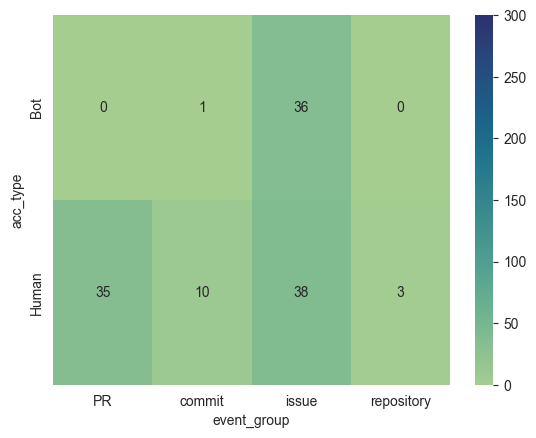

In [116]:
# YOUR CODE BELOW
### Question 2 (b)
sns.heatmap(df_medians, annot=True, vmin=0, vmax=300, cmap="crest")

#### What is the difference that you observe between Bots+Bot actors and Humans?

Human have more events than Bots+Bot actors in median

#### What is the differnce that you observe between Event groups?

1. In median, there is a lot more events in the issue event group than the other event groups in median.
2. There isn't a lot of events in the repository event group in median.
3. There is more events in the PR event group than the commit event group in median.

#### What is the difference that you observe between Bots+Bot actors and Humans and Event groups all considering at the same time?

1. Humans have more events in all event groups than Bots+Bot actors in median
2. Bots+Bot actors don't have any events in the repository event group in median
3. Both Bots+Bot actors and Humans have more or less the same number of events in the issue event group in median
4. Human have a lot more events in the PR event group than Bots+Bot actors in median
5. Humans have more events in the commit event group than Bots+Bot actors in median

### Question 3

#### Create boxen plots to visualise the distribution of number of events in each event group. 
#### For more information you can visit - https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot 
#### You should highlight the data points that correspond to bots using a stripplot in seaborn. https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### Interpret the results of the visualisation.

In [150]:
# YOUR CODE BELOW - Visualize number of events from pull request event group
event_from_PR = final_df[['PR', 'acc_type']]
event_from_PR

,PR,acc_type
0,82.0,Human
1,32.0,Human
2,0.0,Bot
3,0.0,Bot
4,54.0,Human
5,24.0,Human
6,49.0,Human
7,10.0,Bot
8,0.0,Human
9,124.0,Human


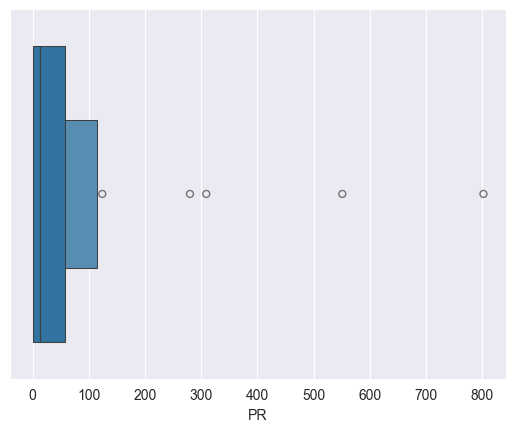

In [151]:
sns.boxenplot(data=event_from_PR, x='PR')
plt.show()

<Axes: xlabel='PR'>

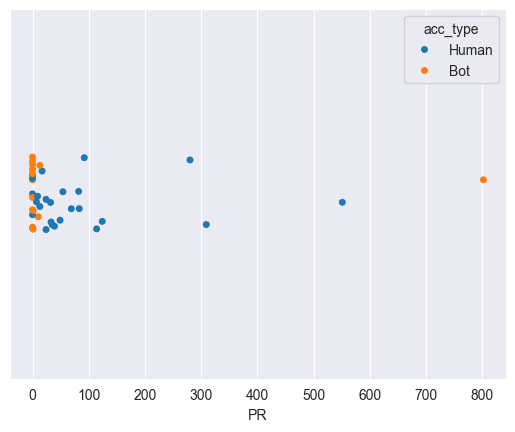

In [152]:
sns.stripplot(data=event_from_PR, x='PR', hue='acc_type')

In terms of the number of events in the PR event group, Bots+Bot actors have either practically no events or a lot of events, whereas Humans have a smaller variance of number of event.

In [153]:
# YOUR CODE BELOW - Visualise number of events from issue event group
event_from_issue = final_df[['issue', 'acc_type']]
event_from_issue

,issue,acc_type
0,38.0,Human
1,12.0,Human
2,18.0,Bot
3,607.0,Bot
4,20.0,Human
5,20.0,Human
6,77.0,Human
7,10.0,Bot
8,0.0,Human
9,99.0,Human


<Axes: xlabel='issue'>

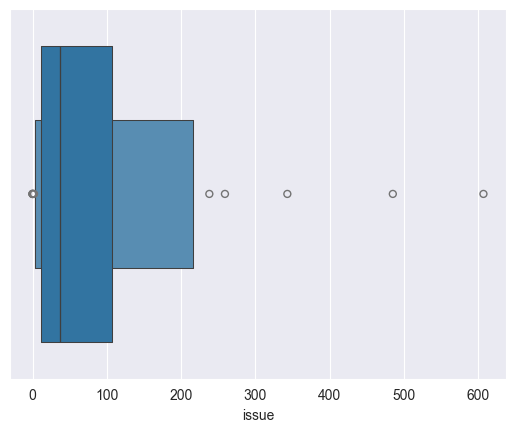

In [157]:
sns.boxenplot(data=event_from_issue, x='issue')

<Axes: xlabel='issue'>

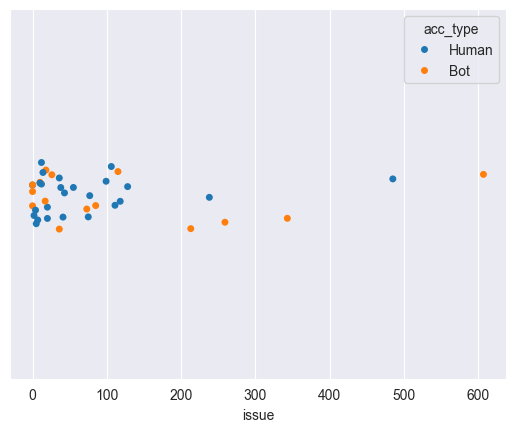

In [155]:
sns.stripplot(data=event_from_issue, x='issue', hue='acc_type')

The variance seem not so different between Bots+Bot actors and Humans in the issue event group.

In [158]:
# YOUR CODE BELOW - Visualise number of events from commit event group
event_from_commit = final_df[['commit', 'acc_type']]
event_from_commit

,commit,acc_type
0,32.0,Human
1,0.0,Human
2,0.0,Bot
3,0.0,Bot
4,1.0,Human
5,0.0,Human
6,133.0,Human
7,23.0,Bot
8,0.0,Human
9,290.0,Human


<Axes: xlabel='commit'>

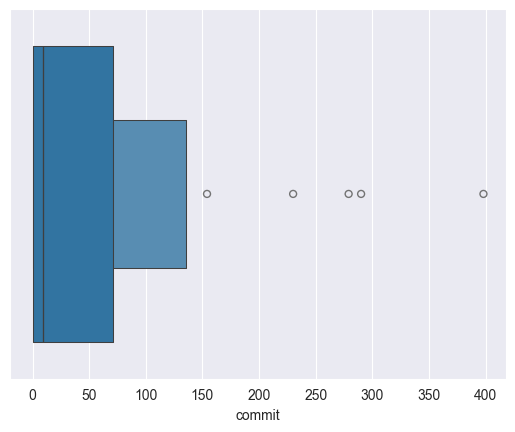

In [159]:
sns.boxenplot(data=event_from_commit, x='commit')

<Axes: xlabel='commit'>

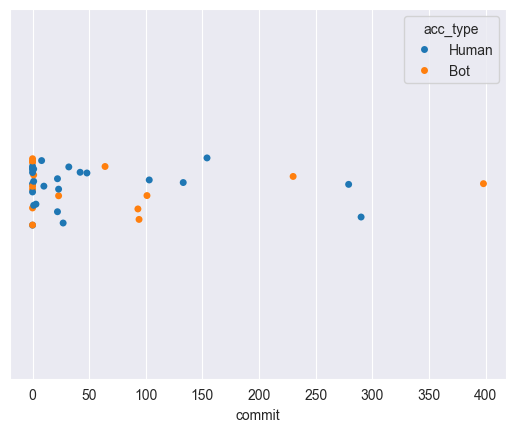

In [160]:
sns.stripplot(data=event_from_commit, x='commit', hue='acc_type')

Bots are prevalent at the extreme values of the number of events in the commit event group.

In [161]:
# YOUR CODE BELOW - Visualise number of events from repo event group
event_from_repo = final_df[['repository', 'acc_type']]
event_from_repo

,repository,acc_type
0,6.0,Human
1,1.0,Human
2,0.0,Bot
3,0.0,Bot
4,0.0,Human
5,1.0,Human
6,17.0,Human
7,10.0,Bot
8,42.0,Human
9,62.0,Human


<Axes: xlabel='repository'>

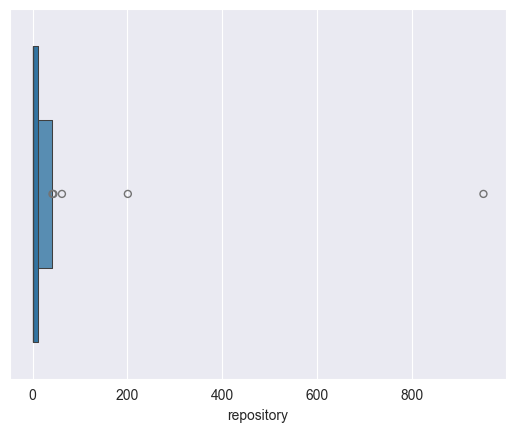

In [162]:
sns.boxenplot(data=event_from_repo, x='repository')

<Axes: xlabel='repository'>

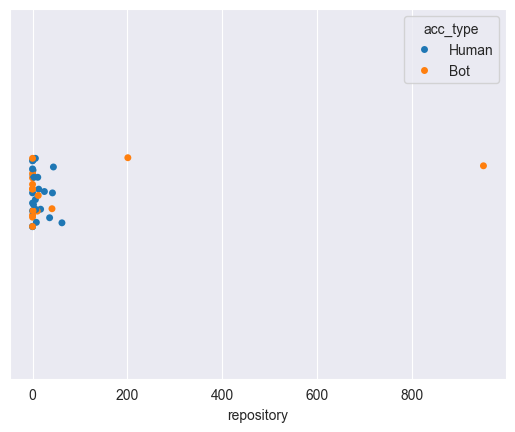

In [163]:
sns.stripplot(data=event_from_repo, x='repository', hue='acc_type')

Bots are prevalent at the extreme values of the number of events in the repository event group.

### Question 4.1

#### Statistical identify whether number of events in each event group is normally distributed or not.
#### Null hypothesis - $H_0$: Sample comes from the data that has normal distribution.
#### Use Shapiro-Wilk test for this purpose. Use the p-value with a threshold of 0.05 to determine whether $H_0$ can be rejected with statistical significance or not. 

#### Use shapiro from scipy.stats to perform this test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [164]:
#Statistical identify whether number of events in each event group is normally distributed or not.
# Null hypothesis - $H_0$: Sample comes from the data that has normal distribution.
# Use Shapiro-Wilk test for this purpose. Use the p-value with a threshold of 0.05 to determine whether $H_0$ can be rejected with statistical significance or not.
# YOUR CODE BELOW
shapiro(event_from_PR['PR'])

ShapiroResult(statistic=np.float64(0.4980921230141765), pvalue=np.float64(1.614684138283145e-10))

We can reject $H_0$ with statistical significance for the PR event group because the p-value is less than 0.05

In [165]:
shapiro(event_from_issue['issue'])

ShapiroResult(statistic=np.float64(0.6685801765530504), pvalue=np.float64(3.082611676369351e-08))

We can reject $H_0$ with statistical significance for the issue event group because the p-value is less than 0.05

In [166]:
shapiro(event_from_commit['commit'])

ShapiroResult(statistic=np.float64(0.6519830683205052), pvalue=np.float64(1.7263808432027603e-08))

We can reject $H_0$ with statistical significance for the commit event group because the p-value is less than 0.05

In [167]:
shapiro(event_from_repo['repository'])

ShapiroResult(statistic=np.float64(0.24857891598226312), pvalue=np.float64(4.783689372467399e-13))

We can reject $H_0$ with statistical significance for the repository event group because the p-value is less than 0.05

### Question 4.2
#### Determine if there is any statistical diﬀerence in number of events between the identified event groups. Perform this test on all pairs of event groups. 
#### Null hypothesis - $H_0$: Any two event group come from the same population.
#### If $H_0$ is rejected in Shapiro-Wilk test (at least for one of the two event groups considered for test), use the Mann-Whitney U statistical test for this purpose. If $H_0$ is not rejected in Shapiro-Wilk test, use the independent t-test for this purpose.  
#### In any case, use the p-value with a threshold of 0.01 to determine whether $H_0$ can be rejected with statistical significance. 

#### Use mannwhitneyu from scipy.stats to perform Mann-Whitney U test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) 
#### or 
#### ttest_ind from scipy.stats to perform independent t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

#### More information:

You can pass the following arguments to mannwhitneyu from scipy.stats - (method='exact', nan_policy='omit'). For ttest_ind you can use - (nan_policy='omit')

In [31]:
# YOUR CODE BELOW

### Question 4.3
#### Each time you reject the null hypothesis $H_0$, quantify the effect size of the diﬀerence between the groups using cliﬀ’s delta ($\delta$). 
#### To calculate cliﬀ’s delta, you can pass the list of values to cliﬀ delta.py file given in the repository. E.g., cliffsDelta.cliffsDelta(list of values, list of values). This will return the effect size.
#### Refer to the table given in the TP document and mention your interpretation (negligible, small, medium, large).

In [ ]:
# YOU CODE BELOW